In [1]:
from numpy import array, exp 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import openturns as ot
from scipy.optimize import curve_fit 
from scipy.stats import genhyperbolic
from scipy.stats import levy_stable
from scipy.stats import norm
from scipy.stats import cumfreq
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import cramervonmises_2samp
from scipy.stats import anderson_ksamp
import matplotlib.ticker as ticker

dataset = pd.read_csv("../data/log_return_data.csv")
dataset

,log_return_vkco,log_return_tcs_il,log_return_poly_il,log_return_five_il
0,-0.012110,-0.004162,-0.003712,-0.013377
1,-0.035292,0.000000,-0.029352,-0.024070
2,0.011583,0.002083,-0.013279,0.007894
3,-0.006740,0.004154,0.025964,-0.002916
4,-0.009709,0.015425,-0.010984,-0.007034
...,...,...,...,...
248,-0.007648,0.018653,0.030041,0.010193
249,0.019012,0.044184,0.029452,-0.006216
250,0.018657,0.038540,0.008584,0.036732
251,0.046940,0.035287,0.042393,0.000000


### Распределение Мейкснера

In [2]:
df_meixner_distribution = pd.DataFrame()
for column in dataset.columns:
    if column == 'log_return_vkco':
        params_meixner = 0.1181087100431582, -0.5375802596579586, 0.27750344850070435, 0.010185845919345671
    if column == 'log_return_tcs_il':
        params_meixner = 0.12943687544387023, -1.1313845306454315, 0.13524139658129836, 0.01255770149959994
    if column == 'log_return_poly_il':
        params_meixner = 0.11226423855931836, 0.31380912996673876, 0.17363171187612478, -0.001349447058232588
    if column == 'log_return_five_il':
        params_meixner = 0.11657223519720798, -0.6607637061643863, 0.12011921111799768, 0.004952407883824025
    
    alpha, beta, gamma, delta = params_meixner[0], params_meixner[1], params_meixner[2], params_meixner[3],

    distribution = ot.MeixnerDistribution(alpha, beta , gamma, delta)
    meixner_distribution = distribution.getSample(253)

    temp = []
    for i in range(len(meixner_distribution)):
        temp.append(meixner_distribution[i][0])
    df_meixner_distribution[column] = temp


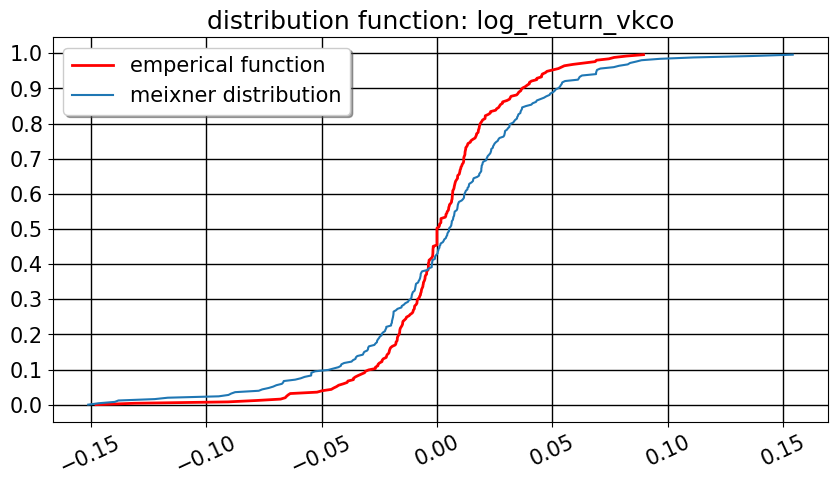

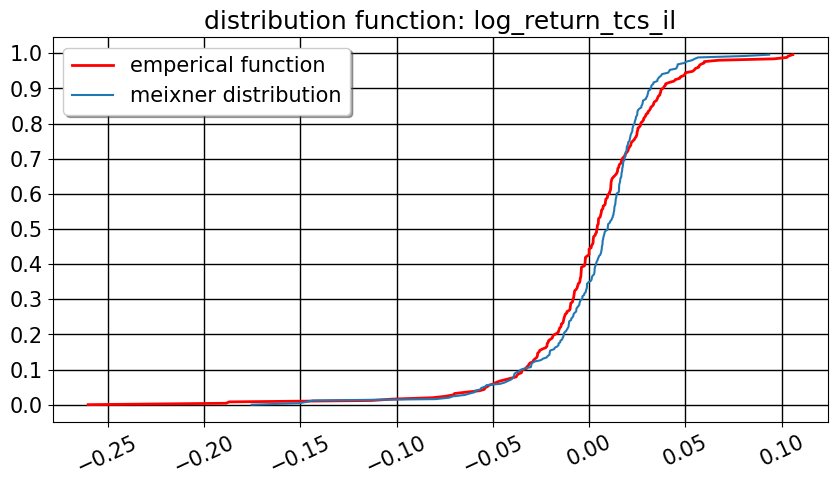

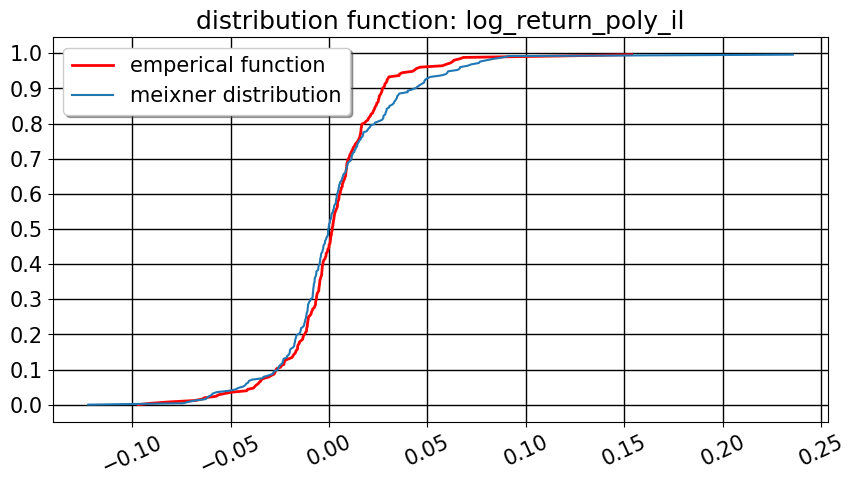

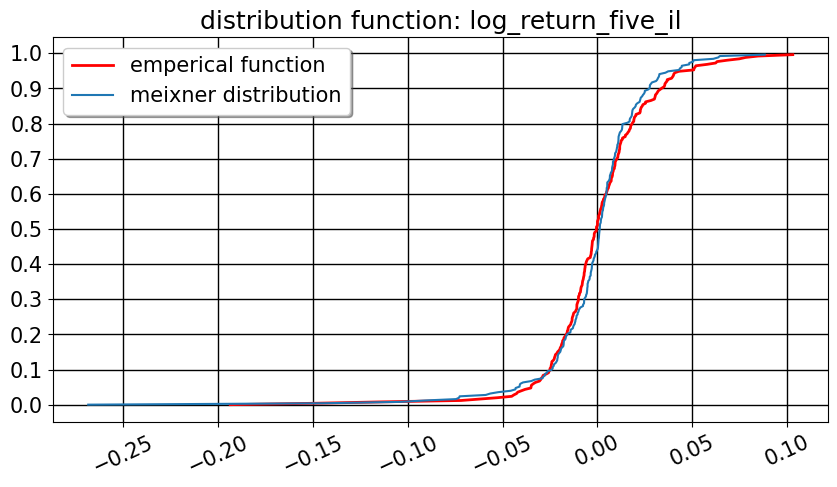

In [9]:
for column in df_meixner_distribution.columns:
    plt.rcParams['font.size'] = '15'
    fig, ax = plt.subplots()
    ax.plot(dataset[column].sort_values(), [i / 253 for i in range(253)], 'r', linewidth=2, label='emperical function')
    plt.plot(df_meixner_distribution[column].sort_values(), [i / 253 for i in range(253)], label='meixner distribution')

    ax.grid(color = 'black',    #  цвет линий
                linewidth = 1,    #  толщина
                linestyle = '-')    #  начертание
    plt.legend(loc = 'best', fancybox = True, shadow = True)

    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.05))  # интервал написания значений оси OX
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OY
    plt.xticks(rotation=25)

    fig.set_figwidth(10)
    fig.set_figheight(5)

    plt.title(f'distribution function: {column}')
    plt.show()

### Устойчивое распределение


In [4]:
df_stable_distribution = pd.DataFrame()
for column in dataset.columns:
    if column == 'log_return_vkco':
        params_stable = 1.5276800168256603, 0.06775389056848138, 0.002312973101911709, 0.015124703251847409
    if column == 'log_return_tcs_il':
        params_stable = 1.6242280662446285, -0.31819880777579945, 0.0018229651641822216, 0.018470190196755942
    if column == 'log_return_poly_il':
        params_stable = 1.4930727316942505, -0.0561148442673356, 0.0012970795405871345, 0.012601632857628105
    if column == 'log_return_five_il':
        params_stable = 1.5793516823353353, 0.3387826766707359, 0.002312300800096754, 0.014135280548957286
    
    alpha, beta, gamma, mu = params_stable[0], params_stable[1], params_stable[2], params_stable[3],

    stable_distribution = levy_stable.rvs(alpha, beta, gamma, mu, size=253, random_state=None)

    df_stable_distribution[column] = stable_distribution


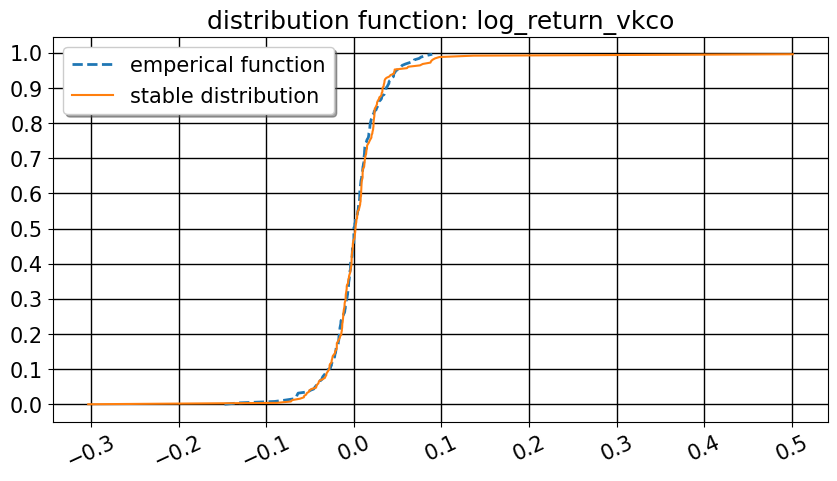

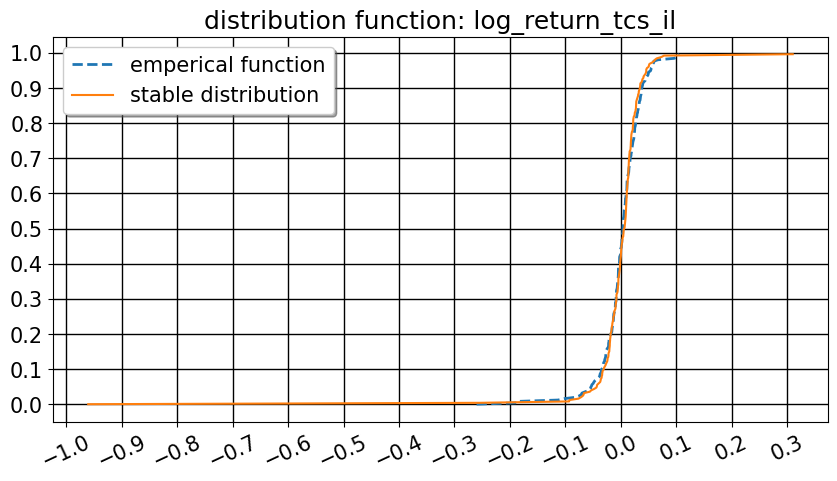

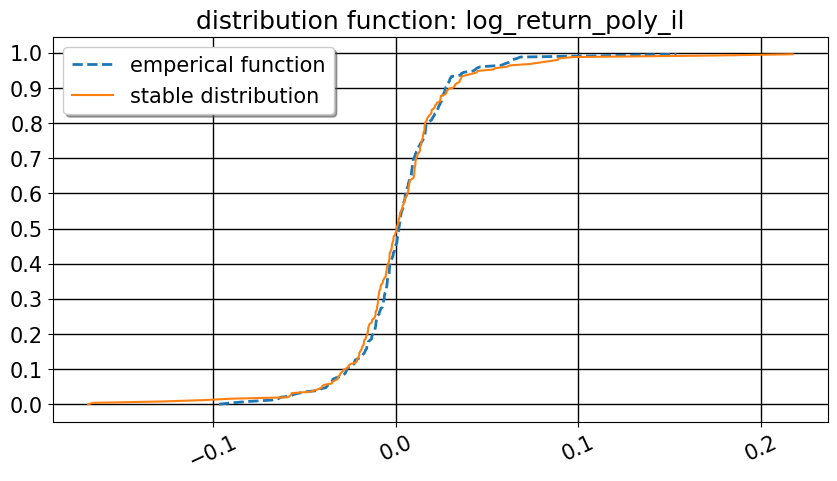

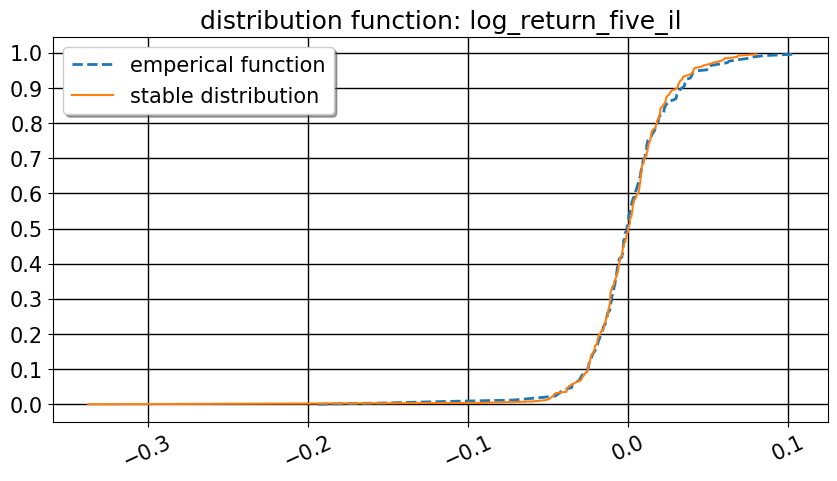

In [11]:
for column in df_stable_distribution.columns:
    plt.rcParams['font.size'] = '15'
    fig, ax = plt.subplots()
    ax.plot(dataset[column].sort_values(), [i / 253 for i in range(253)], '--', linewidth=2, label='emperical function')
    plt.plot(df_stable_distribution[column].sort_values(), [i / 253 for i in range(253)], label='stable distribution')

    ax.grid(color = 'black',    #  цвет линий
                linewidth = 1,    #  толщина
                linestyle = '-')    #  начертание
    plt.legend(loc = 'best', fancybox = True, shadow = True)

    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OX
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OY
    plt.xticks(rotation=25)

    fig.set_figwidth(10)
    fig.set_figheight(5)

    plt.title(f'distribution function: {column}')
    plt.show()

### Гиперболическое распределение

In [6]:
df_hyperbolic_distribution = pd.DataFrame()
for column in dataset.columns:
    if column == 'log_return_vkco':
        params_stable = 0.18487240910475217, 0.41928142227809795, -0.006097985977988421, 0.0015923714135338122, 0.012446959783939653
    if column == 'log_return_tcs_il':
        params_stable = -1.4944949067442233, 0.24280100992887177, -0.19275654619045562, 0.008048368831696174, 0.039015317416485604
    if column == 'log_return_poly_il':
        params_stable = -0.31848345388126176, 0.36664060518728625, 0.005948884841619371, 0.001432326997399279, 0.014291309310523467
    if column == 'log_return_five_il':
        params_stable = -1.3005564141942152, 0.17452859359135492, 0.038837405533930426, -0.001093124053633761, 0.027808091193339605
    
    p, a, b, mu, delta = params_stable[0], params_stable[1], params_stable[2], params_stable[3], params_stable[4]

    hyperbolic_distribution = genhyperbolic.rvs(p, a, b, mu, delta, size=253, random_state=None)

    df_hyperbolic_distribution[column] = hyperbolic_distribution


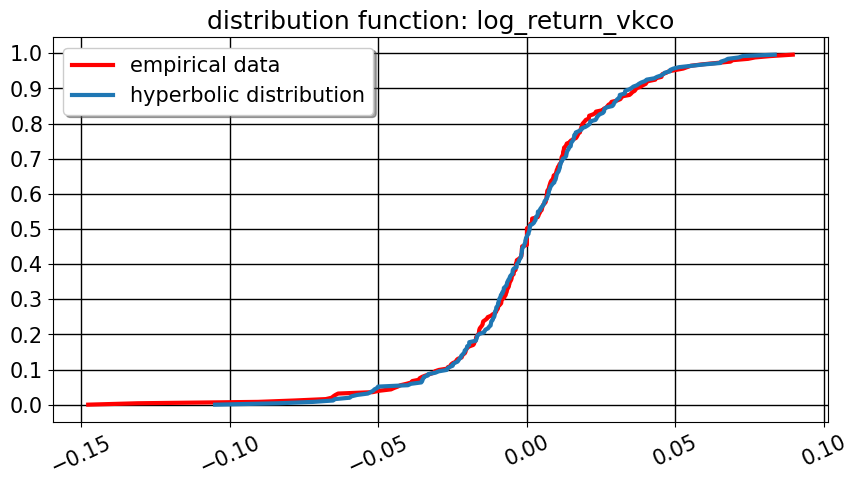

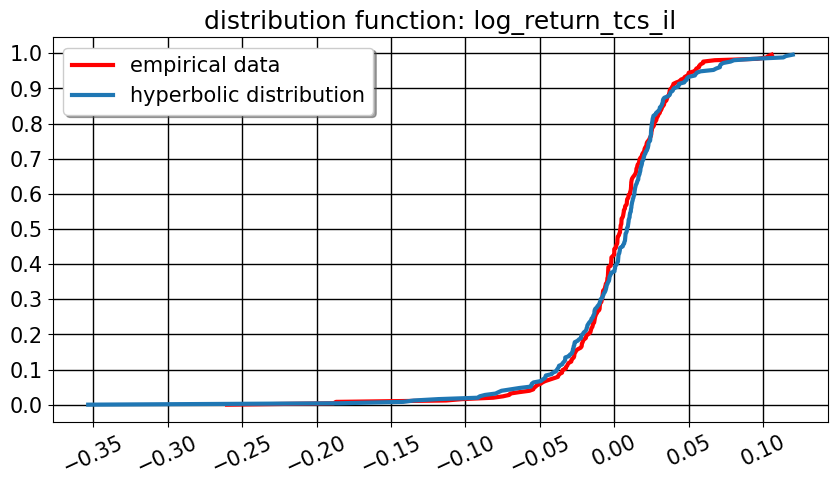

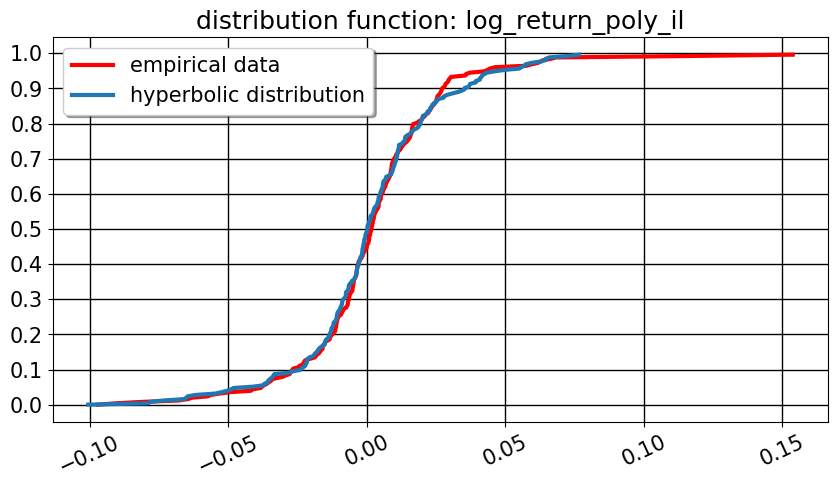

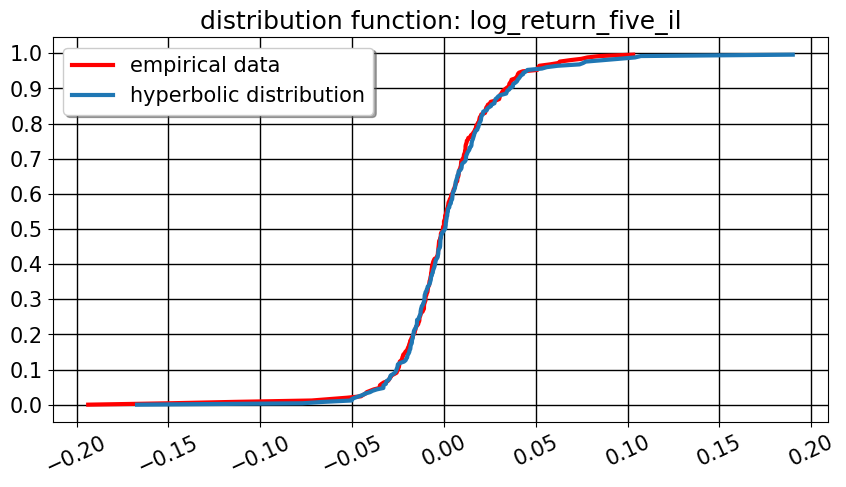

In [12]:
for column in df_hyperbolic_distribution.columns:
    plt.rcParams['font.size'] = '15'
    fig, ax = plt.subplots()
    ax.plot(dataset[column].sort_values(), [i / 253 for i in range(253)], 'r', linewidth=3, label='empirical data')
    plt.plot(df_hyperbolic_distribution[column].sort_values(), [i / 253 for i in range(253)], linewidth=3, label='hyperbolic distribution')

    
    ax.grid(color = 'black',    #  цвет линий
                linewidth = 1,    #  толщина
                linestyle = '-')    #  начертание
    plt.legend(loc = 'best', fancybox = True, shadow = True)     
    


    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.05))  # интервал написания значений оси OX
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OY
    plt.xticks(rotation=25)

    fig.set_figwidth(10)
    fig.set_figheight(5)

    plt.title(f'distribution function: {column}')
    plt.show()

### Все распределения 


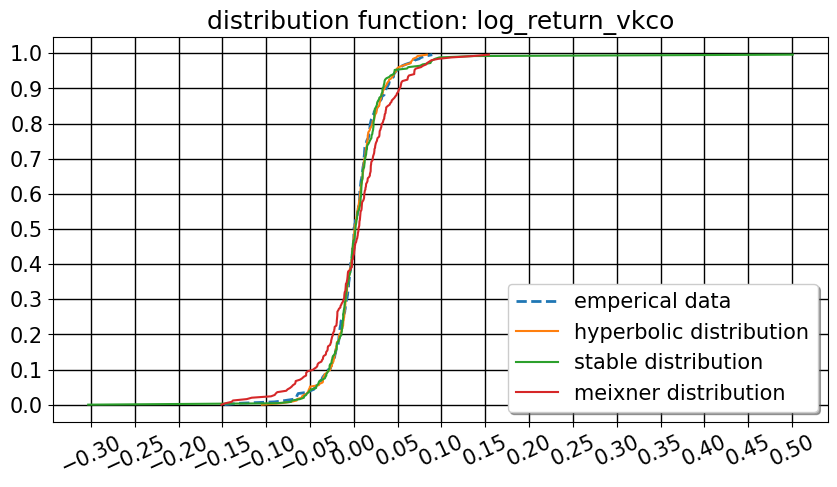

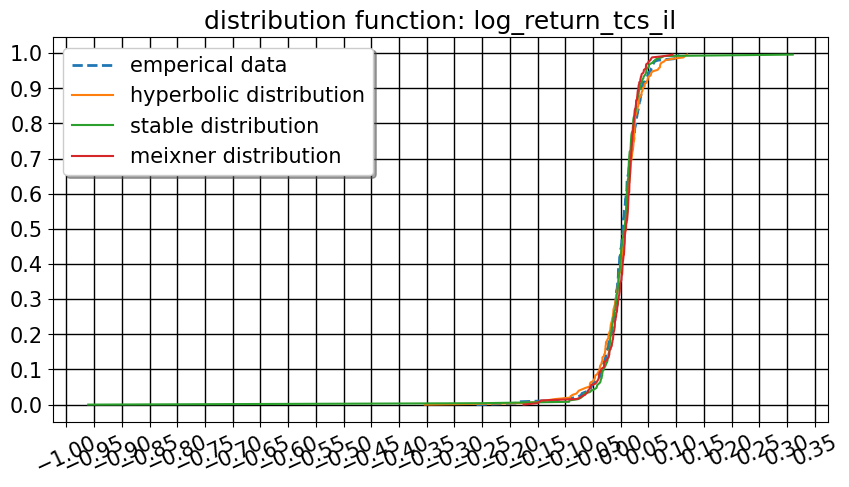

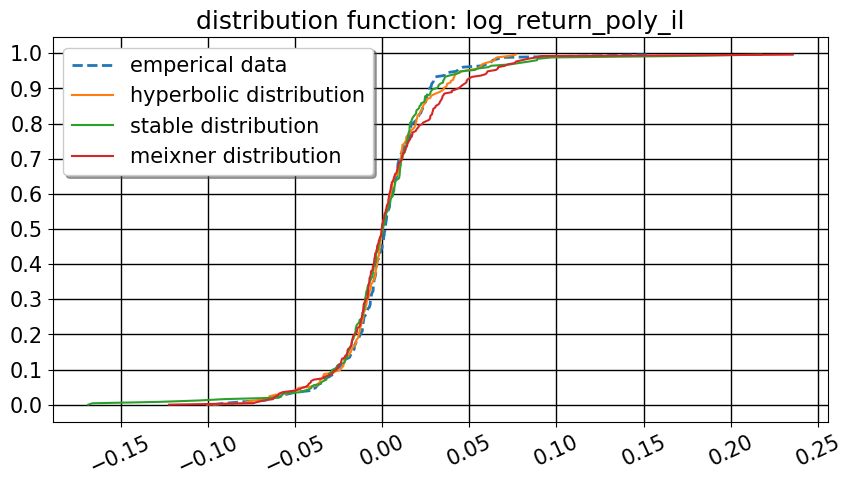

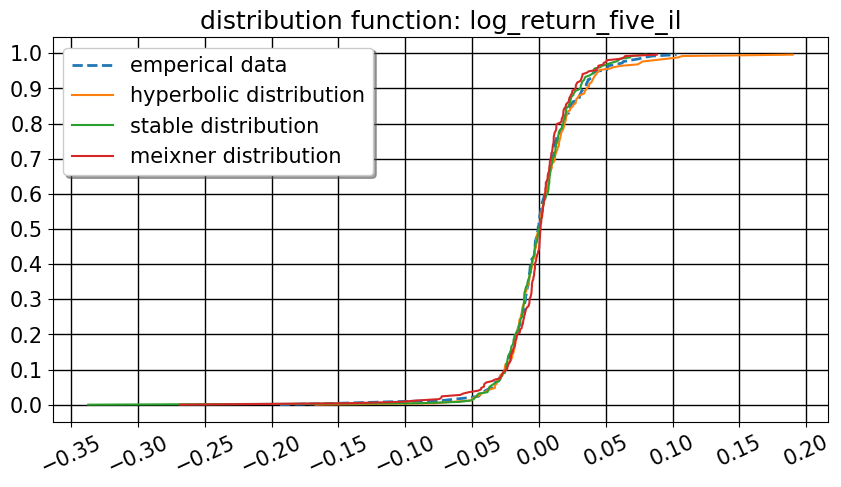

In [14]:
for column in df_hyperbolic_distribution.columns:
    plt.rcParams['font.size'] = '15'
    fig, ax = plt.subplots()


    ax.plot(dataset[column].sort_values(), [i / 253 for i in range(253)], '--', linewidth=2, label='emperical data')
    plt.plot(df_hyperbolic_distribution[column].sort_values(), [i / 253 for i in range(253)], label='hyperbolic distribution')
    plt.plot(df_stable_distribution[column].sort_values(), [i / 253 for i in range(253)], label='stable distribution')
    plt.plot(df_meixner_distribution[column].sort_values(), [i / 253 for i in range(253)], label='meixner distribution')

    ax.grid(color = 'black',    #  цвет линий
                linewidth = 1,    #  толщина
                linestyle = '-')    #  начертание
    plt.legend(loc = 'best', fancybox = True, shadow = True)

    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.05))  # интервал написания значений оси OX
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OY
    plt.xticks(rotation=25)

    fig.set_figwidth(10)
    fig.set_figheight(5)

    plt.title(f'distribution function: {column}')
    plt.show()